In [1]:
# from urllib.parse import urlparse
import pandas as pd
import psycopg2
import re


In [2]:
# Database setup
conn = psycopg2.connect(
    host = 'tiny.db.elephantsql.com',
    user = 'ctcxsudy',
    password = 'IfJNqXnwyiEsTNJDfXdjNVbvv11X6Vi1',
    database = 'ctcxsudy',
    port = 5432
)

cur = conn.cursor()

In [3]:
# Read excel file
df = pd.read_excel('superstore.xlsx')

In [4]:
def to_snake_case(column_name):
    # Remove special characters
    column_name = re.sub(r'[^\w\s]', '', column_name)
    
    # Replace spaces with underscores and convert to lowercase
    column_name = re.sub(r'\s+', '_', column_name).lower()
    
    return column_name

# Rename columns using snake case
df = df.rename(columns=lambda x: to_snake_case(x) if re.search(r'\s|[^A-Za-z0-9_]', x) else x)

In [5]:
def createDataTable():
    global df

    # -------------------------------------------------
    #                      Setup Block
    # -------------------------------------------------
    # Get the excel file
    inputFile = 'superstore.xlsx'
    fileName = 'uploads/' + inputFile
    fileName = 'superstore.xlsx'
    print(fileName)

    try:
        # Create a Dataframe of that excel file
        # df = pd.read_excel(fileName, index_col=False)
        # Define the table name and column names
        table_name = 'DataTable'
        column_names = df.columns.tolist()

        # Define the data types mapping for PostgreSQL
        data_type_mapping = {
            'int64': 'INTEGER',
            'float64': 'NUMERIC',
            'object': 'TEXT',
            'datetime64': 'TIMESTAMP'
        }

        cur.execute(f"DROP TABLE IF EXISTS {table_name}")

        # Generate the CREATE TABLE statement
        create_table_query = f"CREATE TABLE {table_name} ("

        for col in column_names:
            data_type = data_type_mapping.get(str(df[col].dtype), 'TEXT')
            create_table_query += f"{col} {data_type}, "

        # Remove the trailing comma and space
        create_table_query = create_table_query[:-2]
        create_table_query += ");"

        # Execute the CREATE TABLE statement
        cur.execute(create_table_query)

        # Commit the changes
        conn.commit()
        print("Table Created!")

                # Loop through each row and insert the data into the table
        for row in df.itertuples(index=False):
            # Convert row values to SQL-compatible format
            converted_values = []
            for value in row:
                if isinstance(value, str):
                    # Escape single quotes by doubling them
                    value = value.replace("'", "''")
                    converted_values.append(f"'{value}'")
                elif pd.isnull(value):
                    converted_values.append('NULL')
                elif isinstance(value, pd.Timestamp):
                    converted_values.append(f"'{value.strftime('%Y-%m-%d %H:%M:%S')}'")
                elif isinstance(value, (int, float)):
                    # Format numeric values without scientific notation
                    converted_values.append('{:.6f}'.format(value))

#                     converted_values.append(str(value))

#                 placeholders = ', '.join(['%s'] * len(row))
#                 insert_query = f"INSERT INTO {table_name} VALUES ({placeholders})"

                    
            # Generate the INSERT query for the row
            insert_query = f"INSERT INTO {table_name} VALUES ({', '.join(converted_values)})"
            
            # Execute the INSERT query
            cur.execute(insert_query)
        
        # Commit the changes
        conn.commit()
        print("Rows Inserted!")

#         print("Rows Inserted!")

    except Exception as e:
        # Handle the exception here
        conn.rollback()
        print("An error occurred:", str(e))



In [6]:
# createDataTable()

In [7]:
import matplotlib.pyplot as plt
df

,unnamed_0,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium,2011
1,1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium,2011
2,2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High,2011
3,3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High,2011
4,4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,CA-2011-118192,2011-01-14,2011-01-19,Standard Class,Michael Moore,Consumer,Ohio,United States,US,...,Office Supplies,Paper,Xerox 1923,37.408,7,0.2,13.0928,1.46,Medium,2011
196,196,CA-2011-162775,2011-01-14,2011-01-16,Second Class,Chris Selesnick,Corporate,Louisiana,United States,US,...,Office Supplies,Binders,Staples,5.640,3,0.0,2.7072,0.85,Critical,2011
197,197,TU-2011-4040,2011-01-14,2011-01-18,Standard Class,Bruce Degenhardt,Consumer,Gaziantep,Turkey,EMEA,...,Office Supplies,Art,"Stanley Canvas, Blue",79.152,4,0.6,-87.1680,0.43,Medium,2011
198,198,CA-2011-118192,2011-01-14,2011-01-19,Standard Class,Michael Moore,Consumer,Ohio,United States,US,...,Office Supplies,Binders,Avery Metallic Poly Binders,3.438,2,0.7,-2.5212,0.27,Medium,2011


<BarContainer object of 200 artists>

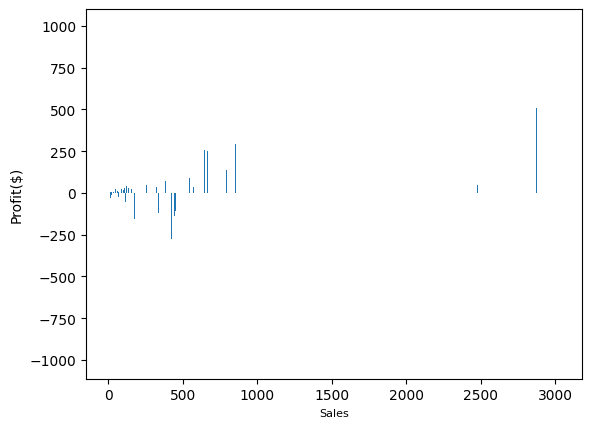

In [8]:
# Bar Chart
x= df['sales']
y =df['profit']
plt.xlabel('Sales', fontsize = 8)
plt.ylabel('Profit($)')
plt.bar(x,y)


ImportError: cannot import name 'ImportedStyleSheet' from 'bokeh.models' (C:\Users\lovel\AppData\Local\Programs\Python\Python310\lib\site-packages\bokeh\models\__init__.py)